In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

# labels

In [4]:
labels = os.listdir(".")

In [5]:
labels

['.ipynb_checkpoints',
 'BrainTumorDetectionFlask-master',
 'brain_tumor_dataset',
 'mri.h5',
 'mri.ipynb']

# visualize random 1 image

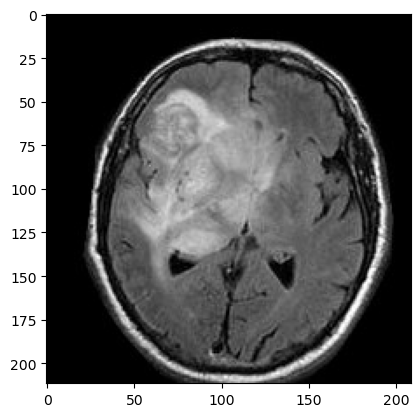

In [2]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y2.jpg"))

In [3]:
import os
import cv2
labels = ['yes', 'no']
def get_data(dir_path="/kaggle/input/brain-mri-images-for-brain-tumor-detection"):
    labels = ['yes', 'no']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num += 0
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data


In [15]:
data = get_data("/kaggle/input/brain-mri-images-for-brain-tumor-detection")


0
1


IndexError: index 0 is out of bounds for axis 0 with size 0

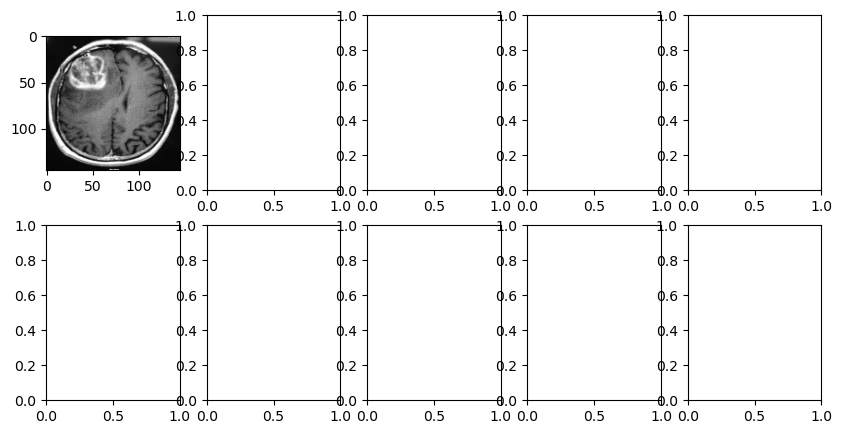

In [16]:
import random
import matplotlib.pyplot as plt

# Get a random subset of images
subset = random.sample(data, k=10)

# Display the images with labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(subset[i][0])
    ax.set_title(labels[subset[i][1]])
    ax.axis('off')
plt.show()


In [ ]:
import numpy as np

# Create empty arrays to store pixel values
yes_pixels = np.empty((0, 3), int)
no_pixels = np.empty((0, 3), int)

# Loop through preprocessed data and add pixel values to appropriate array
for img, label in data:
    if label == 0:
        yes_pixels = np.vstack((yes_pixels, img.reshape(-1,3)))
    else:
        no_pixels = np.vstack((no_pixels, img.reshape(-1,3)))

# Plot histograms of pixel values for each class
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(yes_pixels, bins=50, color=['r','g','b'], alpha=0.5)
ax[0].set_title('Tumor Present')
ax[1].hist(no_pixels, bins=50, color=['r','g','b'], alpha=0.5)
ax[1].set_title('Tumor Absent')

plt.suptitle('Histograms of Pixel Values for Tumor Presence', fontsize=16)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store image counts for each class
df = pd.DataFrame(columns=['Class', 'Count'])
for label in labels:
    path = os.path.join(dir_path, label)
    count = len(os.listdir(path))
    df = df.append({'Class': label, 'Count': count}, ignore_index=True)

# Plot bar chart of class distribution
ax = df.plot(kind='bar', x='Class', y='Count', rot=0, legend=False)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.title("Class Distribution of image counts")
plt.show()


In [20]:
def get_data(dir_path="/kaggle/input/brain-mri-images-for-brain-tumor-detection"):
    labels = ['yes', 'no']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=0
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [21]:
data_train = get_data()

0
1


In [22]:

from keras.preprocessing.image import ImageDataGenerator

In [23]:
def image_gen(height=145, width=145,dataset_dir = "./brain_tumor_dataset/",batch_size=32):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            )
    train_ds = datagen.flow_from_directory(
        dataset_dir,
        batch_size=batch_size,
        subset="training",
        shuffle=True,
        class_mode="binary",
        target_size=(height, width),
        classes={'no': 0., 'yes': 1.}
    )
    
    val_ds = datagen.flow_from_directory(
        dataset_dir,
        batch_size=batch_size,
        subset="validation",
        shuffle=True,
        class_mode="binary",
        target_size=(height, width),
        classes={'no': 0., 'yes': 1.}
    )
    
    return train_ds, val_ds
    

def augmented_data(height=145, width=145,dataset_dir = "./brain_tumor_dataset/",batch_size=32):
    datagen = ImageDataGenerator(
        rescale= 1./255.,
        width_shift_range= 0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=30,
        horizontal_flip=True,
        brightness_range=(0.5, 1.0)
    )
    
    train_ds = datagen.flow_from_directory(
        dataset_dir,
        batch_size=batch_size,
        shuffle=True,
        class_mode="binary",
        target_size=(height, width),
        classes={'no': 0., 'yes': 1.}
    )
    
    return train_ds

train_ds, val_ds = image_gen()

total_images = np.concatenate([train_ds.labels, val_ds.labels])
print('\n\n',{"No brain tumor cases": len(np.where(total_images==0)[0]),
             "Brain tumor cases": len(np.where(total_images==1)[0])})

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


 {'No brain tumor cases': 0, 'Brain tumor cases': 0}


IndexError: index 0 is out of bounds for axis 0 with size 0

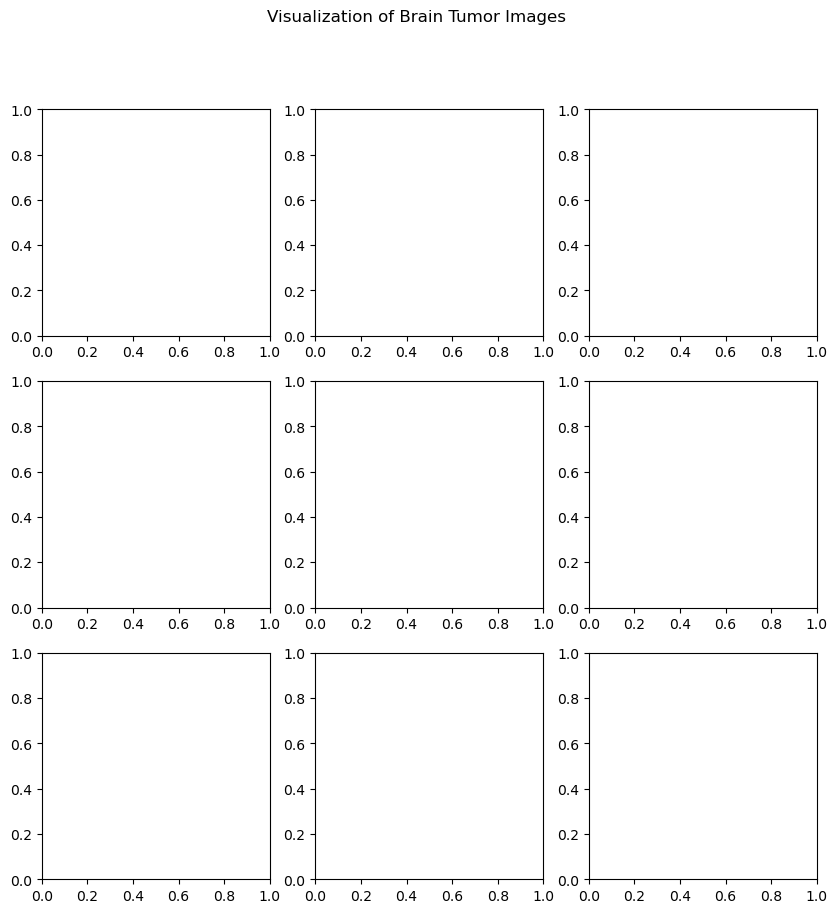

In [24]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
fig.suptitle("Visualization of Brain Tumor Images")

for k in range(9):
    images, labels = train_ds.next()
    #print(images[0].shape)
    i, j = k//3, k%3
    ax[i, j].imshow(images[0])
    ax[i, j].set_title(f"label {int(labels[0])}")
    ax[i, j].axis('off')
plt.show()

# new variable to store

In [28]:
new_data = get_data()

0
1


# separate label and features

In [29]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [30]:
X

[array([[[1, 1, 1],
         [1, 1, 1],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [1, 1, 1],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [1, 1, 1],
         ...,
         [3, 3, 3],
         [1, 1, 1],
         [2, 2, 2]],
 
        ...,
 
        [[2, 2, 2],
         [2, 2, 2],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [3, 3, 3],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[3, 3, 3],
         [4, 4, 4],
         [3, 3, 3],
         ...,
         [7, 7, 7],
         [5, 5, 5],
         [2, 2, 2]]], dtype=uint8),
 array([[[143, 141, 140],
         [  7,   5,   4],
         [  9,   7,   6],
         ...,
         [  9,  10,   8],
         [ 94,  95,  93],
      

In [31]:
y.count(1)

98

# reshape the array

In [32]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [33]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [34]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# label array

In [35]:
y = np.array(y)

# train test split

In [36]:
from sklearn.model_selection import train_test_split
seed = 0
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [37]:
len(X_test)

51

In [38]:
def preprocess_images(dir_path, img_size=145):
    # Define labels and empty lists for storing preprocessed data
    labels = ['yes', 'no']
    data = []
    target = []
    
    # Loop through images in each class and preprocess them
    for label in labels:
        path = os.path.join(dir_path, label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            
            # Read image using OpenCV
            img = cv2.imread(img_path)
            
            # Resize image
            img = cv2.resize(img, (img_size, img_size))
            
            # Convert image to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply Gaussian blur to reduce noise
            img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
            
            # Apply adaptive thresholding to convert to binary image
            img = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
            
            # Append preprocessed image and label to lists
            data.append(img)
            target.append(label)
    
    # Convert lists to numpy arrays
    data = np.array(data)
    target = np.array(target)
    
    # Reshape data to have 4 dimensions for input to CNN
    data = data.reshape(-1, img_size, img_size, 1)
    
    # Normalize pixel values
    data = data / 255.0
    
    return data, target

# Preprocess images and visualize a few examples
X, y = preprocess_images(dir_path='./brain_tumor_dataset')
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))

plt.suptitle('Examples of Preprocessed Brain Tumor Images')   
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(145, 145), cmap='gray')
    ax.set_title(y[i])
    ax.axis('off') 
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './brain_tumor_dataset/yes'

IndexError: index 0 is out of bounds for axis 0 with size 0

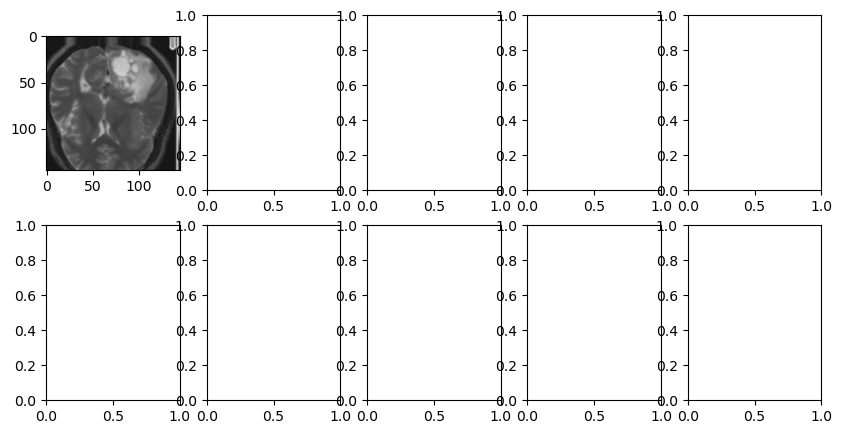

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation parameters
augmentations = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# Generate augmented images and plot a subset
subset = augmentations.flow(X_train, y_train, batch_size=10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(subset.next()[0][0].astype('uint8'))
    ax.set_title(labels[subset.next()[1][0]])
    ax.axis('off')
plt.show()


# Not necessary, only use to matching with my pc version

In [40]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [41]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [42]:
tf.__version__

'2.11.0'

# keras version

In [43]:
import keras
keras.__version__

'2.11.0'

# Data Augmentation

In [44]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False,)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False,)

# Model

In [45]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [46]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense( 128, activation = 'relu'))
classifier.add(Dense( 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        73760     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [47]:

history=classifier.fit(train_generator,
                       epochs = 300,
                         validation_data = test_generator,
                        shuffle=True, 
                        validation_steps=len(test_generator))


Epoch 1/300
7/7 [==============================] - 9s 198ms/step - loss: 0.6780 - accuracy: 0.6436 - val_loss: 0.6548 - val_accuracy: 0.6275
Epoch 2/300
7/7 [==============================] - 1s 139ms/step - loss: 0.6334 - accuracy: 0.6287 - val_loss: 0.5949 - val_accuracy: 0.7059
Epoch 3/300
7/7 [==============================] - 1s 134ms/step - loss: 0.6043 - accuracy: 0.7079 - val_loss: 0.6164 - val_accuracy: 0.6275
Epoch 4/300
7/7 [==============================] - 1s 134ms/step - loss: 0.6118 - accuracy: 0.7079 - val_loss: 0.5669 - val_accuracy: 0.7059
Epoch 5/300
7/7 [==============================] - 1s 135ms/step - loss: 0.5940 - accuracy: 0.7327 - val_loss: 0.5619 - val_accuracy: 0.7255
Epoch 6/300
7/7 [==============================] - 1s 136ms/step - loss: 0.5841 - accuracy: 0.7030 - val_loss: 0.5553 - val_accuracy: 0.7451
Epoch 7/300
7/7 [==============================] - 1s 138ms/step - loss: 0.5763 - accuracy: 0.7228 - val_loss: 0.5482 - val_accuracy: 0.7059
Epoch 8/300
7

# history

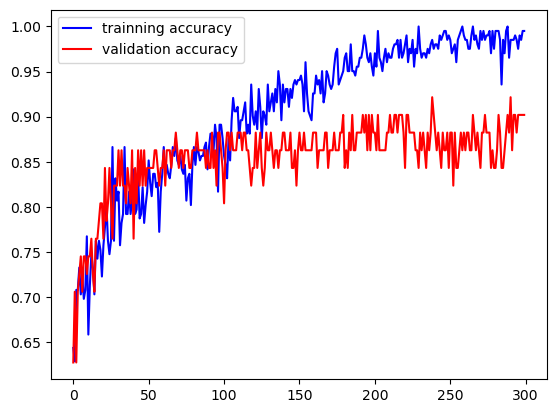

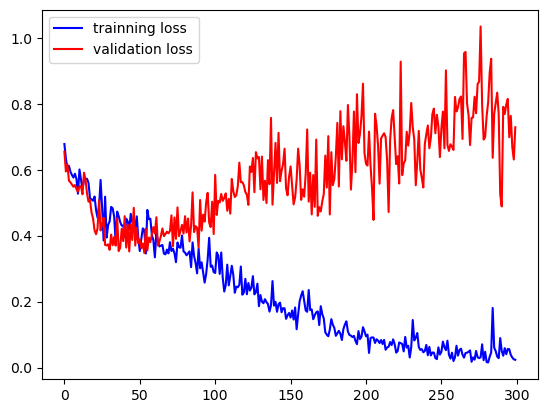

In [48]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [50]:
classifier.save("mri.h5")

In [51]:
classifier = tf.keras.models.load_model("./mri.h5")

# Prediction

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
prediction = classifier.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [54]:
prediction=prediction.round()

In [55]:
pd.DataFrame(prediction)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [56]:
pd.DataFrame(y_test)

,0
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [57]:
import pandas as pd
pd.DataFrame(y_test).cumsum()

,0
0,1
1,1
2,2
3,2
4,2
5,3
6,3
7,4
8,4
9,4


In [58]:
prediction

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# classification report

In [59]:
labels_new = ["yes", "no"]

In [60]:
print(confusion_matrix(y_test, prediction))

[[28  1]
 [13  9]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.90      0.41      0.56        22

    accuracy                           0.73        51
   macro avg       0.79      0.69      0.68        51
weighted avg       0.78      0.73      0.70        51



# predicting function

In [62]:
labels_new = ["yes", "no"]
IMG_SIZE = 145
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./mri.h5")

In [63]:
def check(input_img):
    print(" your image is : " + input_img)
    print(input_img)

    img = tf.keras.utils.load_img( input_img, target_size=(145, 145))
    img = np.asarray(img)
    print(img)

    img = np.expand_dims(img, axis=0)

    print(img)
    output = model.predict(img)

    print(output)
    if output[0][0] == 0:
        status = True
    else:
        status = False

    print(status)
    return status


In [64]:
check("./brain_tumor_dataset/no/12 no.jpg")

 your image is : ./brain_tumor_dataset/no/12 no.jpg
./brain_tumor_dataset/no/12 no.jpg


FileNotFoundError: [Errno 2] No such file or directory: './brain_tumor_dataset/no/12 no.jpg'

# Prediction 
## 0-yes, 1-no

In [80]:
result= model.predict([prepare("./brain_tumor_dataset/no/12 no.jpg")])
result.round()

array([[1.]], dtype=float32)

In [81]:

prediction = classifier.predict(prepare("./brain_tumor_dataset/no/12 no.jpg"))
prediction.round()

array([[1.]], dtype=float32)

In [82]:
prediction = classifier.predict(prepare("./brain_tumor_dataset/yes/Y19.jpg"))
prediction.round()

array([[0.]], dtype=float32)

In [83]:
check("./brain_tumor_dataset/yes/Y19.jpg")

 your image is : ./brain_tumor_dataset/yes/Y19.jpg

./brain_tumor_dataset/yes/Y19.jpg

[[[ 2  6  5]

  [ 1  5  4]

  [ 4  8  7]

  ...

  [ 0  4  3]

  [ 0  4  3]

  [ 0  3  2]]



 [[ 2  6  5]

  [ 1  5  4]

  [ 4  8  7]

  ...

  [ 1  5  4]

  [ 0  4  3]

  [ 0  4  3]]



 [[ 2  6  5]

  [ 1  5  4]

  [ 4  8  7]

  ...

  [ 2  6  5]

  [ 1  5  4]

  [ 1  5  4]]



 ...



 [[25 27 26]

  [24 26 25]

  [23 25 24]

  ...

  [20 20 20]

  [20 20 20]

  [20 20 20]]



 [[28 28 28]

  [27 27 27]

  [25 25 25]

  ...

  [22 22 22]

  [22 22 22]

  [22 22 22]]



 [[29 29 29]

  [28 28 28]

  [26 26 26]

  ...

  [24 24 24]

  [24 24 24]

  [24 24 24]]]

[[[[ 2  6  5]

   [ 1  5  4]

   [ 4  8  7]

   ...

   [ 0  4  3]

   [ 0  4  3]

   [ 0  3  2]]



  [[ 2  6  5]

   [ 1  5  4]

   [ 4  8  7]

   ...

   [ 1  5  4]

   [ 0  4  3]

   [ 0  4  3]]



  [[ 2  6  5]

   [ 1  5  4]

   [ 4  8  7]

   ...

   [ 2  6  5]

   [ 1  5  4]

   [ 1  5  4]]



  ...



  [[25 27 26]

   [24 26 25]



True

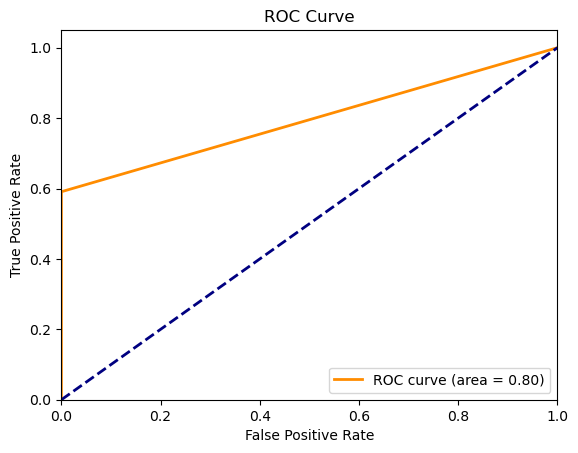

In [86]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities on test set
y_prob = classifier.predict(X_test)[:, 0]

# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
